In [ ]:
#Carrie Gold
#BMI 6030
#Module 13 

#Using one of the three datasets to demonstrate k-means clustering using the 
#scikit learn package (50 points). Be sure to review the readings before you 
#start on this assignment. Calculate the sum of least square error for each 
#different values of 'k'. Using Matplotlib determine the optimal number of 
#clusters (k) using the elbow method along with a brief explanation (50 points).
#Finally plot the optimal clusters with their centroids along with a brief 
#explanation (50 points). Comment your code as needed.

#Import data
#Choose two variables
#Create a scatter plot with Seaborn
#Calculate the sum of least square error 

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib as mp 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
#Uploading data
d_data = pd.read_csv("diabetic_data.csv")
d_data.describe()

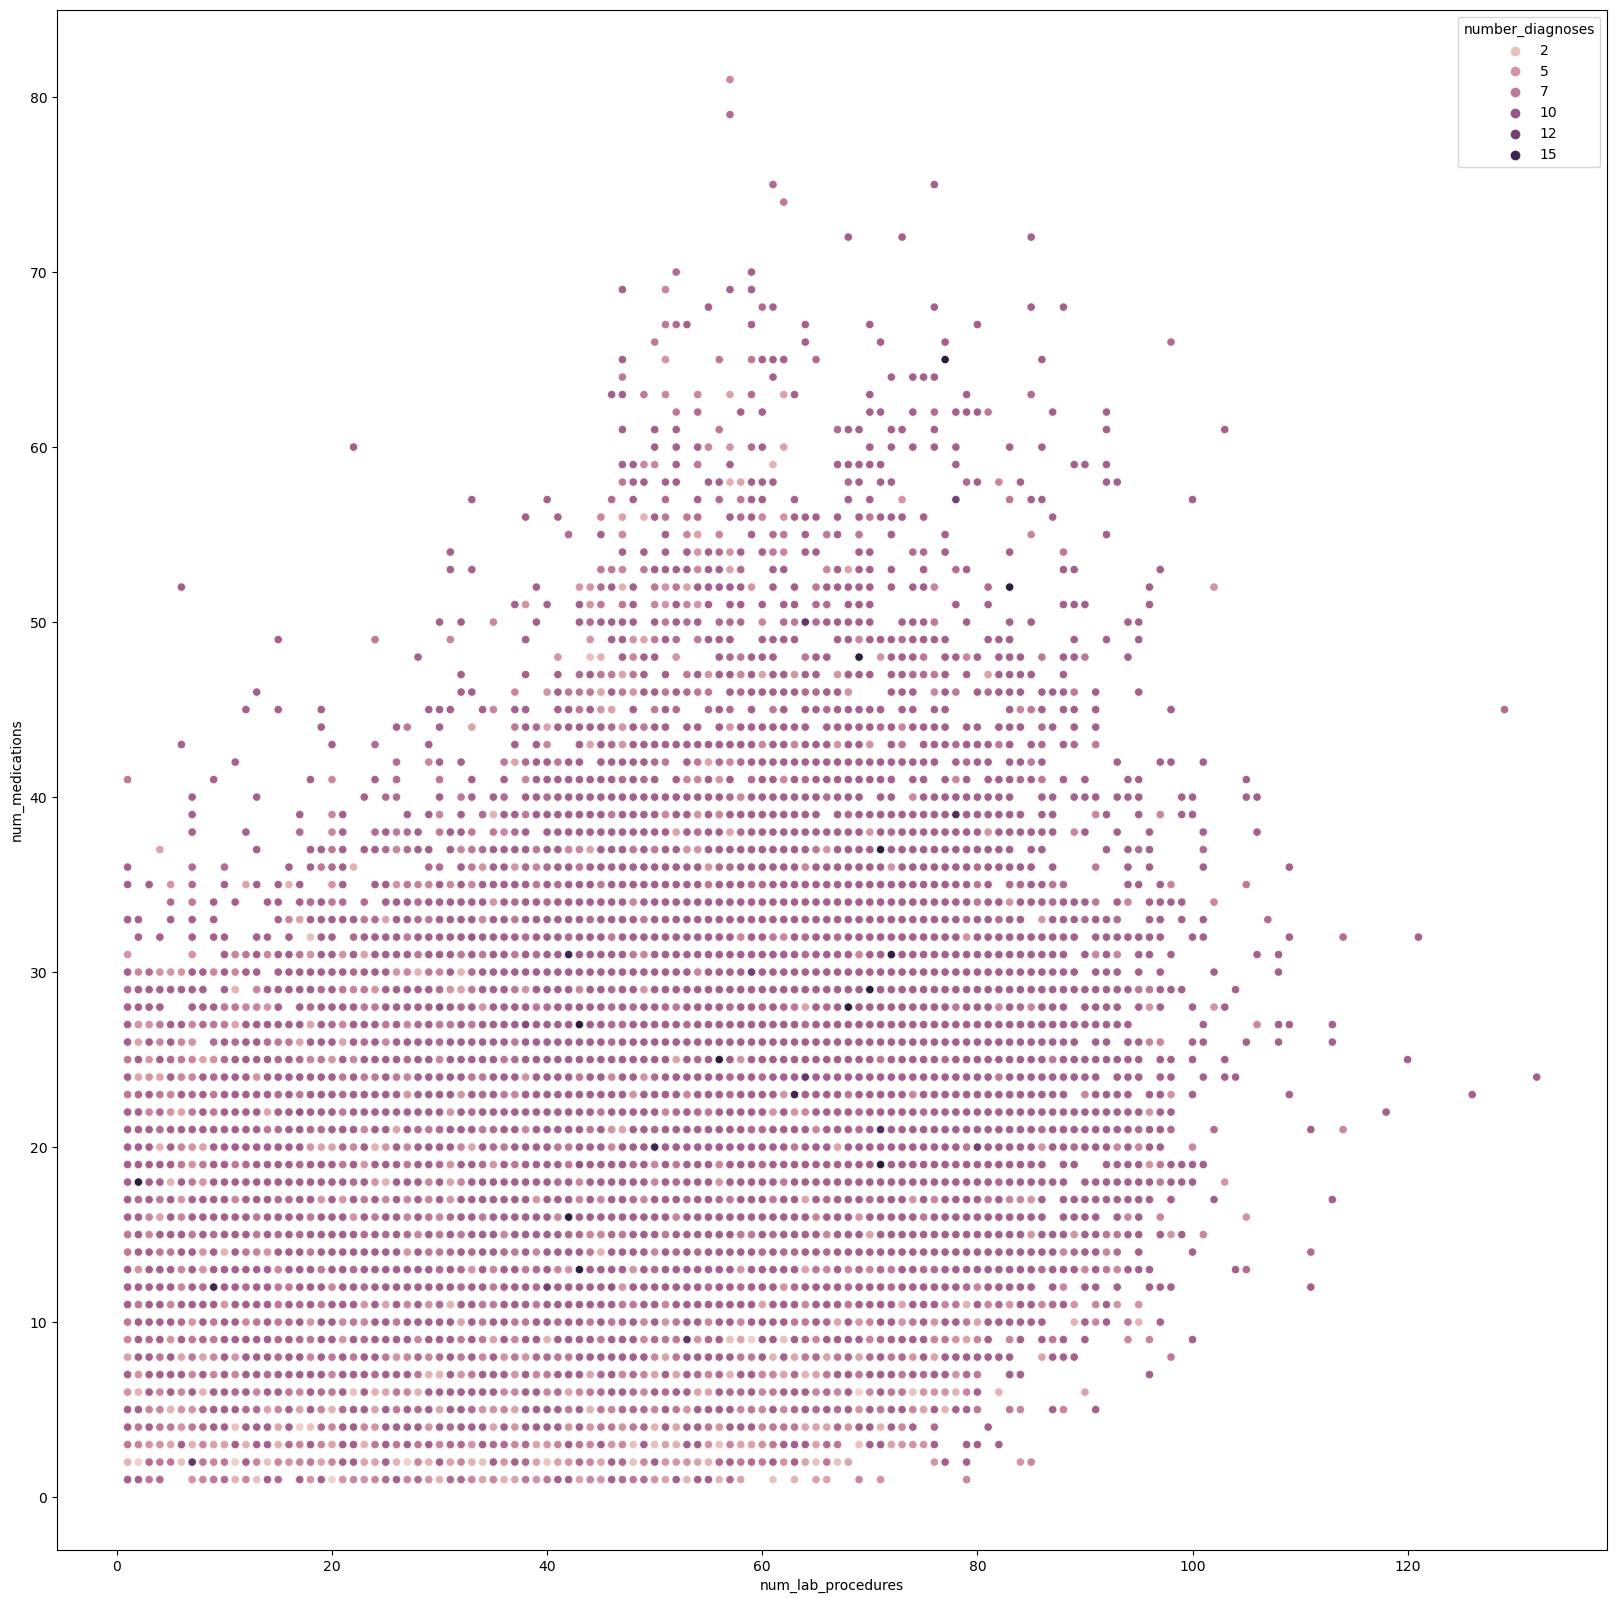

In [7]:
#Visualizing the data
plt.figure(figsize=(20,20))
sns.scatterplot(data=d_data, x='num_lab_procedures', y='num_medications', hue='number_diagnoses')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Splitting the data set 
X_train, X_test, y_train, y_test = train_test_split(d_data[['num_lab_procedures', 'num_medications']], 
                                                    d_data[['number_diagnoses']], test_size=0.33, 
                                                    random_state=0)

#Normalizing the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

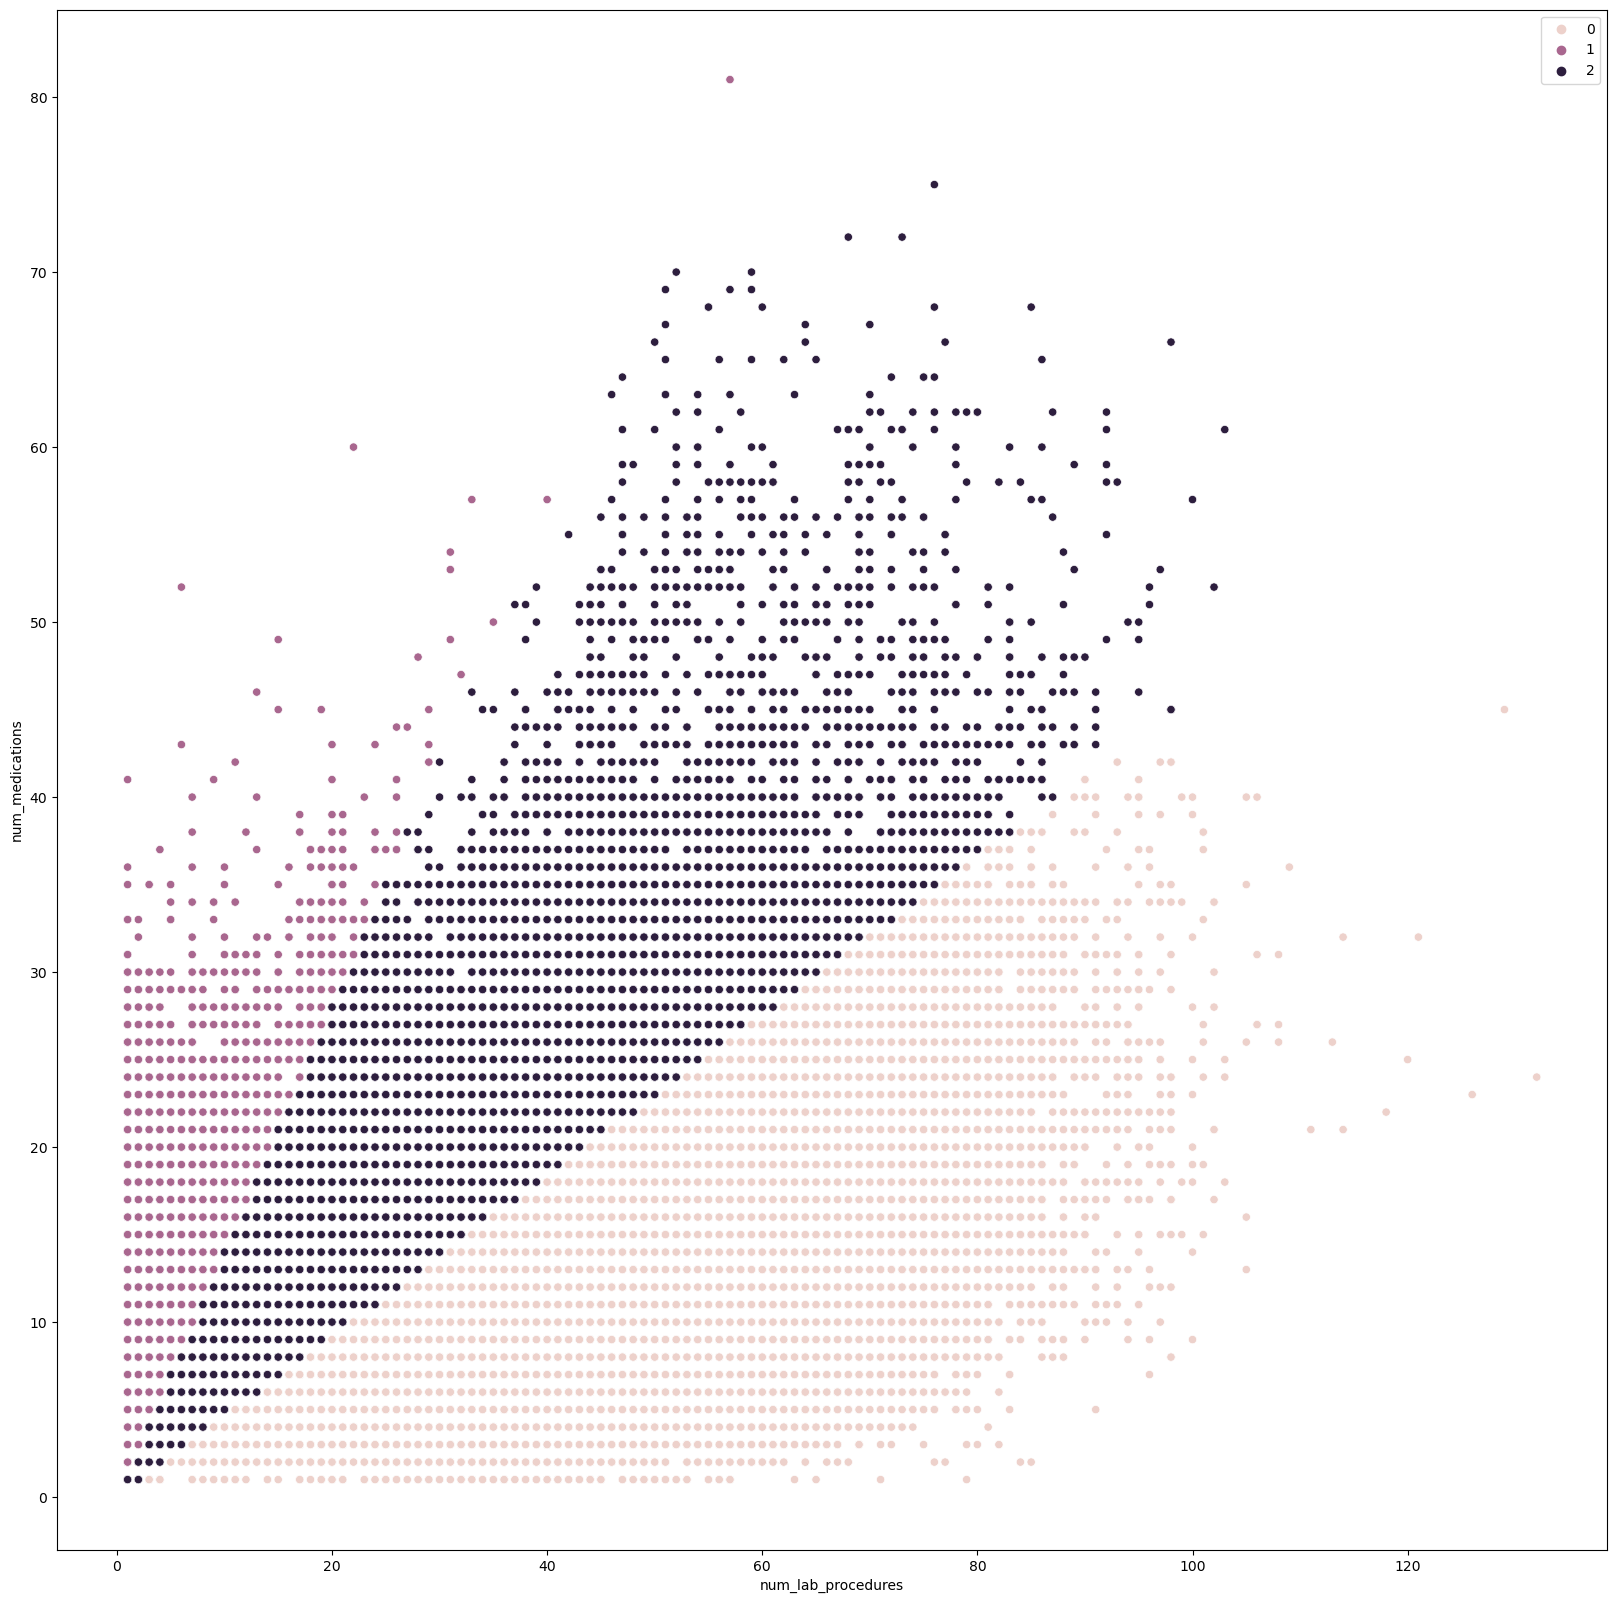

In [16]:
#Start clusters
plt.figure(figsize=(20,20))
sns.scatterplot(data= X_train, x='num_lab_procedures', y='num_medications', hue= kmeans.labels_)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

In [ ]:
#Elbow method to estimate optimal number of clusters
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    fits.append(model)
    
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))
    
plt.figure(figsize=(20, 20))
sns.lineplot(x = K, y = score)
plt.show()

In [ ]:
#The elbow method is a way to estimate the optimal number of clusters, determined by where the 
#rate of decrease slows down and the graph starts to level out. I am going to try 3 clusters.

In [ ]:
#Plotting the clusters with centroids
plt.figure(figsize=(20,20))
centroids = fits[2].cluster_centers_
sns.scatterplot(data = X_train, x='num_lab_procedures', y='num_medications', hue = fits[2].labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], color= 'blue',label= 'Centroids', s=100)
plt.legend()
plt.show()